# Task 4 - To Explore Decision Tree Algorithm

# Problem Statement : For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

## #Mandatory imports

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# #Load the iris dataset

In [2]:
iris = pd.read_csv(r"C:\Users\home\Desktop\SPARK\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# #Check nulls

In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# #Check value counts of "Species"column

In [4]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# #Convert non-numeric column i.e "Species" to numeric 

In [5]:
iris.Species.replace({"Iris-versicolor":0 , "Iris-setosa":1 , "Iris-virginica":2} , inplace = True)

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


## #Splitting X and Y variables

In [7]:
iris_x = iris.iloc[:, 1:5]
iris_y = iris.iloc[:,-1]

# #Split the data into Train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
iris_x_train,iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x,iris_y, test_size = 0.2)

In [10]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot

C:\Users\home\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Defining the decision tree algorithm


In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)

dtree.fit(iris_x_train , iris_y_train)
#print('Decision Tree Classifer Created')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# #Visualize the graph

In [12]:
dot_data = StringIO()   # creating the empty file

In [13]:
iris_x_train_names = iris_x_train.columns #variable containing feature names

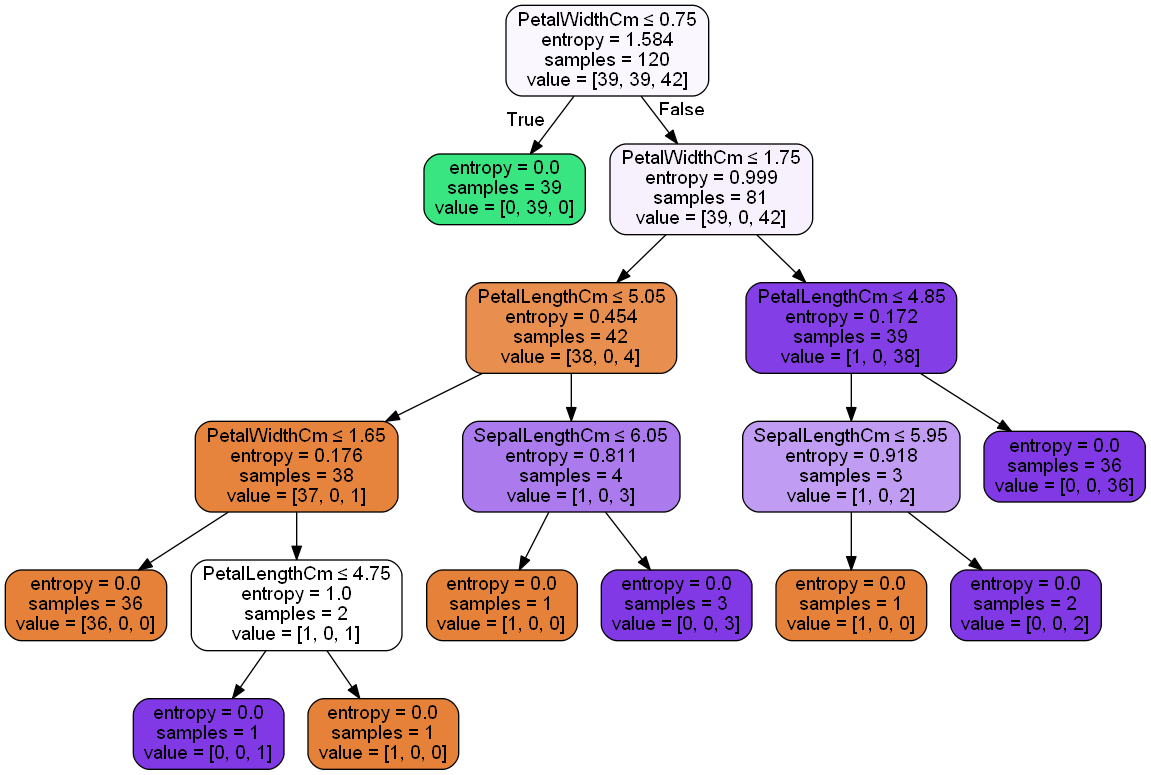

<Figure size 864x864 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,12))

export_graphviz(dtree , out_file = dot_data,
               filled = True, rounded = True,  #filled =True: fill values in nodes
               special_characters = True , feature_names = iris_x_train_names ) 
#if we dont write feature_names = iris_x_train_names, then also it will work but it will not take the feature names rather it will take numbers 1,2,3..

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Now we can  feed any new data to this classifer and it would be able to predict the right class accordingly.